# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('DS Assignment 1.csv')

### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
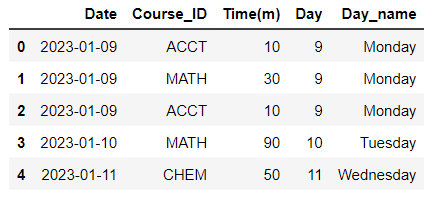

In [5]:
df.head()

,Initials,Date,Course ID,Time (m),Summary
0,NaN,NaN,NaN,NaN,NaN
1,ZP,1/9/2023,ENGL 200,15.0,Read book for in class discussion
2,ZP,1/9/2023,MATH 231,15.0,Read textbook for in class discussion
3,ZP,1/11/2023,ENGL 200,15.0,Read book for in class discussion
4,ZP,1/12/2023,MATH 231,20.0,Read textbook for in class discussion


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Initials   28 non-null     object 
 1   Date       28 non-null     object 
 2   Course ID  28 non-null     object 
 3   Time (m)   28 non-null     float64
 4   Summary    28 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [7]:
df.columns

Index(['Initials', 'Date', 'Course ID', 'Time (m)', 'Summary'], dtype='object')

In [10]:
# Is there any column you want to drop? If yes which column and why?
# Yes, I need to drop the Summary column
df.drop(['Summary'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Initials', 'Date', 'Course ID', 'Time (m)'], dtype='object')

In [24]:
# Convert the date column to datetime
df['Date']=pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Initials   28 non-null     object        
 1   Date       28 non-null     datetime64[ns]
 2   Course ID  28 non-null     object        
 3   Time (m)   28 non-null     float64       
 4   Day        28 non-null     float64       
 5   Day_name   28 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.5+ KB


In [21]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['Date'].dt.day
df.head()

,Initials,Date,Course ID,Time (m),Day,Day_name
0,NaN,NaT,NaN,NaN,NaN,NaN
1,ZP,2023-01-09,ENGL 200,15.0,9.0,Monday
2,ZP,2023-01-09,MATH 231,15.0,9.0,Monday
3,ZP,2023-01-11,ENGL 200,15.0,11.0,Wednesday
4,ZP,2023-01-12,MATH 231,20.0,12.0,Thursday


In [19]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']=df['Date'].dt.day_name()
df.head()

,Initials,Date,Course ID,Time (m),Day,Day_name
0,NaN,NaT,NaN,NaN,NaN,NaN
1,ZP,2023-01-09,ENGL 200,15.0,9.0,Monday
2,ZP,2023-01-09,MATH 231,15.0,9.0,Monday
3,ZP,2023-01-11,ENGL 200,15.0,11.0,Wednesday
4,ZP,2023-01-12,MATH 231,20.0,12.0,Thursday


In [39]:
df.columns=['Initials', 'Date', 'Course_ID', 'Time', 'Day', 'Day_name']
df.columns

Index(['Initials', 'Date', 'Course_ID', 'Time', 'Day', 'Day_name'], dtype='object')

### Answer the questions

In [64]:
# What is the average time you have spend for learning?
# Answer: 38.75
df.describe()

,Time,Day
count,28.000000,28.000000
mean,38.750000,14.750000
std,20.349948,9.403014
min,15.000000,1.000000
25%,20.000000,6.750000
50%,40.000000,13.000000
75%,51.250000,23.250000
max,90.000000,31.000000


In [42]:
# Display all of the entries where you have spent more than the average time to learn 
df.query('Time > 38.75')

,Initials,Date,Course_ID,Time,Day,Day_name
5,ZP,2023-01-14,MATH 215,60.0,14.0,Saturday
6,ZP,2023-01-17,ECON 232,40.0,17.0,Tuesday
8,ZP,2023-01-19,MATH 231,45.0,19.0,Thursday
9,ZP,2023-01-20,MATH 215,60.0,20.0,Friday
10,ZP,2023-01-23,DS 160,40.0,23.0,Monday
13,ZP,2023-01-25,ECON 232,45.0,25.0,Wednesday
15,ZP,2023-01-26,MATH 231,90.0,26.0,Thursday
16,ZP,2023-01-28,DS 160,45.0,28.0,Saturday
17,ZP,2023-01-29,MATH 215,50.0,29.0,Sunday
18,ZP,2023-01-31,ECON 232,55.0,31.0,Tuesday


In [55]:
# Which course you have spent the maximum time to prepare?
#Answer: MATH 215

print('MATH 215 sum: ', sum(df.query('Course_ID=="MATH 215"')['Time']))
print('MATH 231 sum: ', sum(df.query('Course_ID=="MATH 231"')['Time']))
print('ECON 232 sum: ', sum(df.query('Course_ID=="ECON 232"')['Time']))
print('ENGL 200 sum: ', sum(df.query('Course_ID=="ENGL 200"')['Time']))
print('DS 160 sum: ', sum(df.query('Course_ID=="DS 160"')['Time']))

MATH 215 sum:  325.0
MATH 231 sum:  305.0
ECON 232 sum:  185.0
ENGL 200 sum:  125.0
DS 160 sum:  145.0


In [57]:
# Which day of the week you sepent most of the time?
#Answer: Thursday

print('Sunday: ', sum(df.query('Day_name=="Sunday"')['Time']))
print('Monday: ', sum(df.query('Day_name=="Monday"')['Time']))
print('Tuesday: ', sum(df.query('Day_name=="Tuesday"')['Time']))
print('Wednesday: ', sum(df.query('Day_name=="Wednesday"')['Time']))
print('Thrusday: ', sum(df.query('Day_name=="Thursday"')['Time']))
print('Friday: ', sum(df.query('Day_name=="Friday"')['Time']))
print('Saturday: ', sum(df.query('Day_name=="Saturday"')['Time']))


Sunday:  75.0
Monday:  145.0
Tuesday:  160.0
Wednesday:  210.0
Thrusday:  280.0
Friday:  60.0
Saturday:  155.0


### Investigate the distribution of Time, adding the mean. How the data distributed?
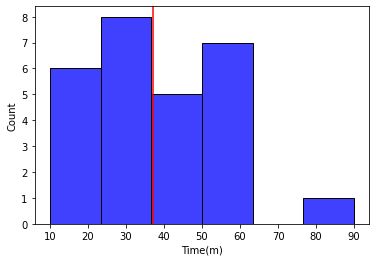

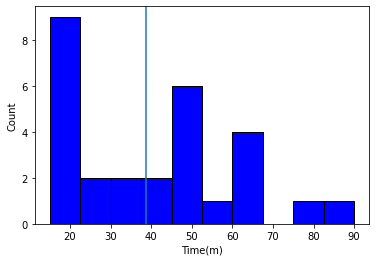

In [89]:
plt.hist(df['Time'], color='blue', edgecolor='black')
plt.xlabel('Time(m)')
plt.ylabel('Count')
plt.axvline(np.nanmean(df['Time']))
plt.show()

### The data is right-skewed with a mean at about 39 minutes. 

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
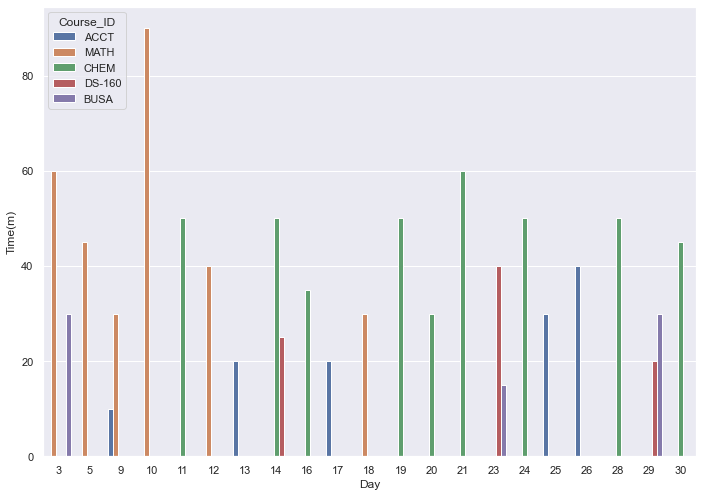

<AxesSubplot:xlabel='Day', ylabel='Time'>

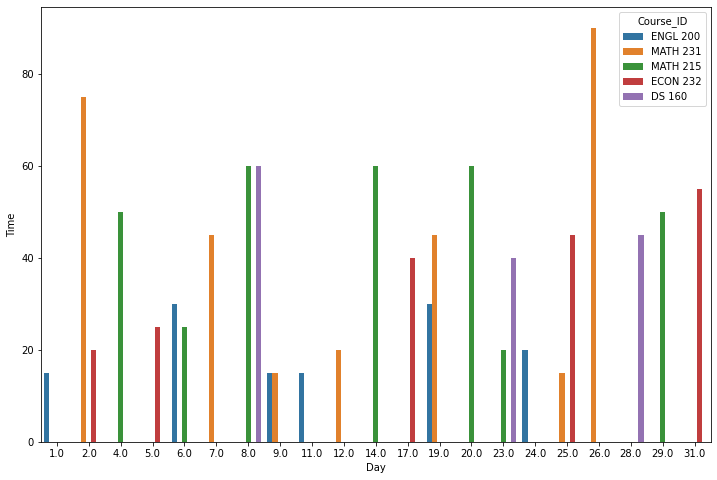

In [87]:
plt.figure(figsize=(12,8))
sns.barplot(x='Day', y='Time', data=df, hue='Course_ID', ci=False)


### This is showing the days of the month with total time spent on a certain subject. We can see that my two most time worked subjects in a day is Math 231. 

### Investigate the measure of dispersion (table and plot) of time column.
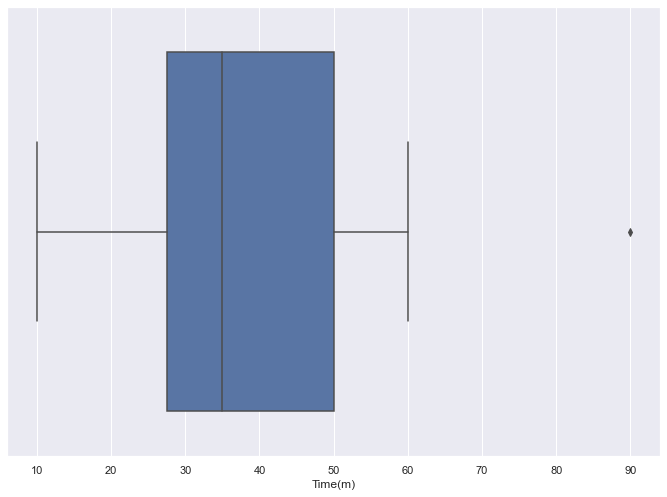

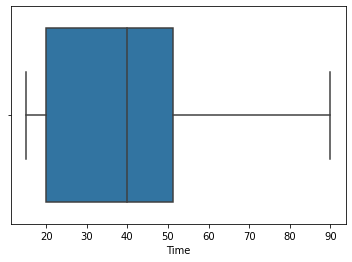

In [90]:
box_plot=sns.boxplot(x='Time', data=df)

### Investigate the the distribution of time by Day_name
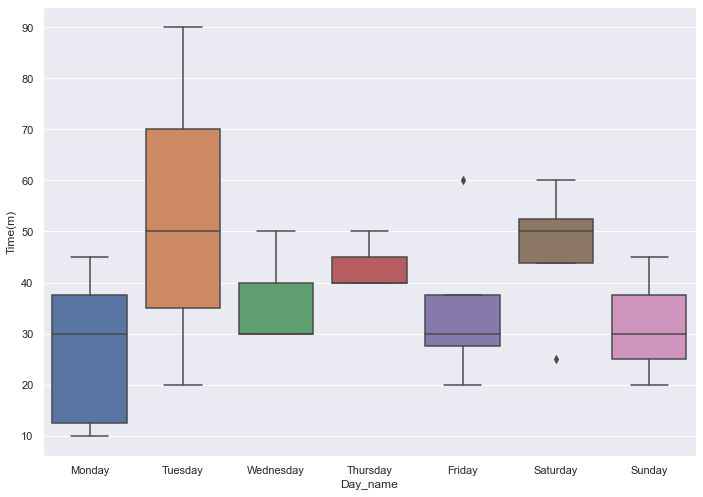

In [91]:
df.columns

Index(['Initials', 'Date', 'Course_ID', 'Time', 'Day', 'Day_name'], dtype='object')

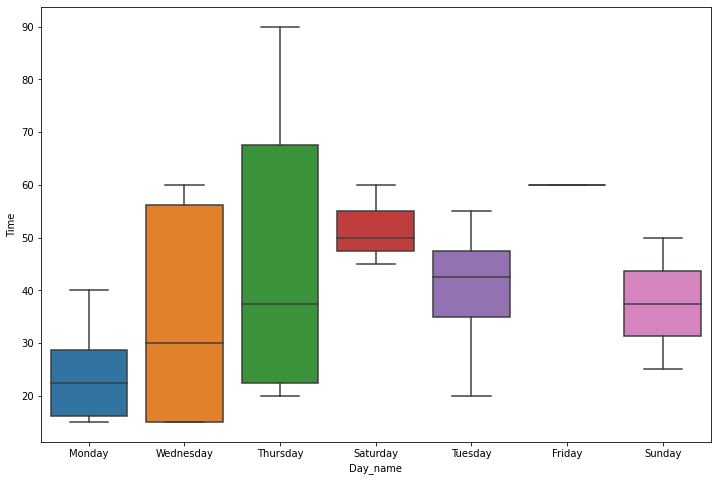

In [95]:
plt.figure(figsize=(12,8))
box_plot=sns.boxplot(x='Day_name', y='Time', data=df)

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
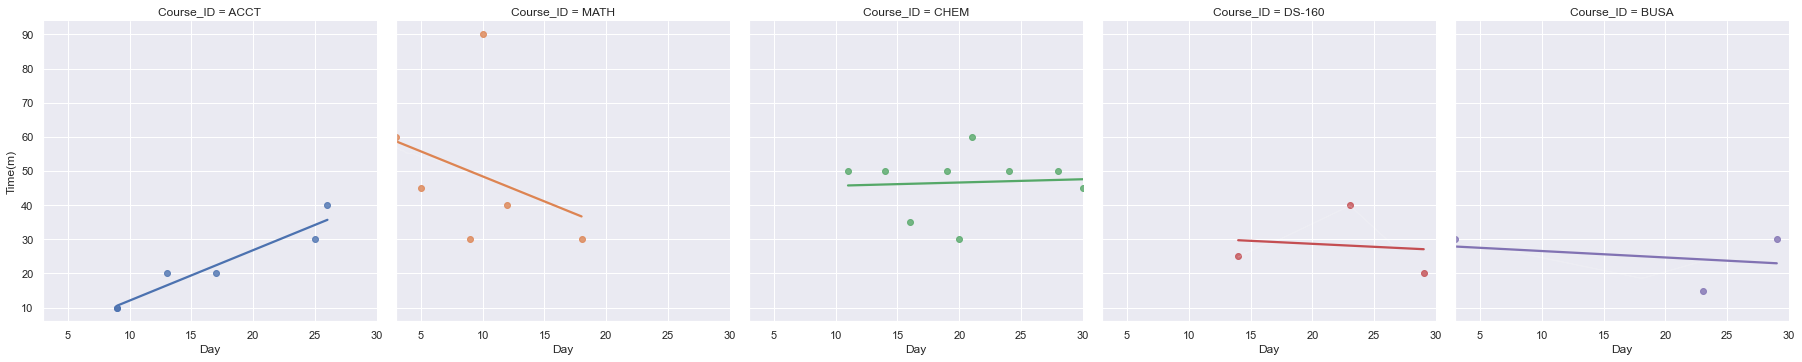

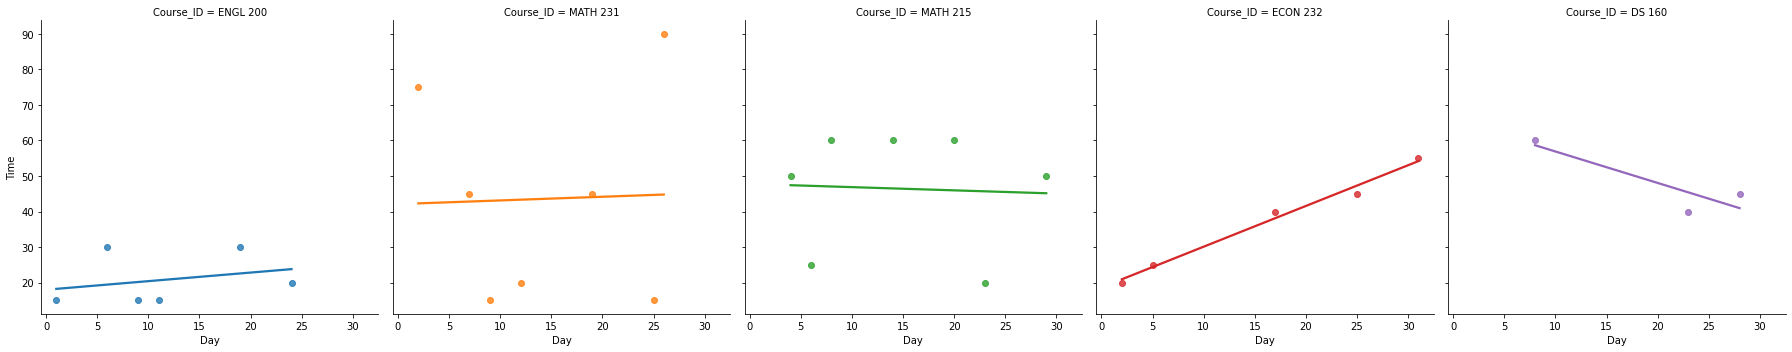

In [96]:
lm_plot=sns.lmplot(x='Day', y='Time', data=df, ci=False, hue='Course_ID', col='Course_ID')

### Create a pair plot of Day and Time and add course id as hue
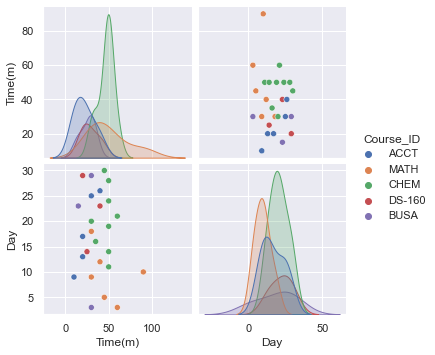

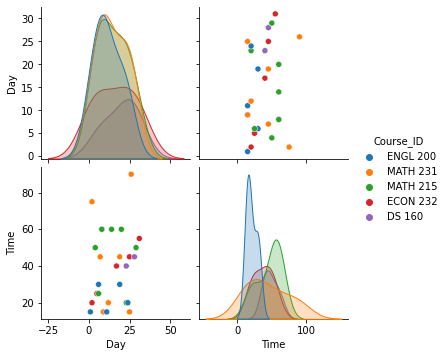

In [99]:
pair_plot=sns.pairplot(df[['Day', 'Time', 'Course_ID']], hue='Course_ID')

### Display the Heatmap and comment on your findings
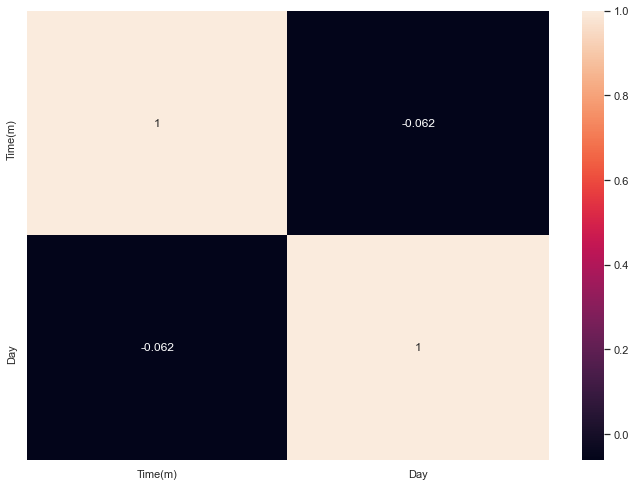

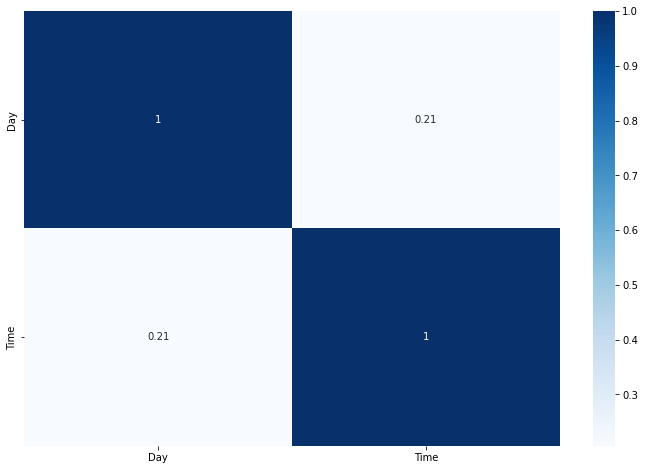

In [107]:
plt.figure(figsize=(12,8))
corr=df[['Day', 'Time']].corr(method='pearson')
cols=['Day', 'Time']
heat_map=sns.heatmap(corr, annot=True, xticklabels=cols, yticklabels=cols, 
                    cmap='Blues')

### There is not a very strong correlation between Time and Day